In [107]:

import os
import sys
import earthpy as et
from osgeo import gdal
from osgeo import ogr
from osgeo import osr
from glob import glob
import rioxarray as rxr
from rioxarray import merge
import earthpy.plot as ep

#from osgeo import gdal_array
#from osgeo import gdalconst

os.chdir(os.path.join(et.io.HOME, "earth-analytics"))

file_path = os.path.join(et.io.HOME, 
                         "earth-analytics", 
                         'data', 
                         'fire-histories')


file_path_rgb = os.path.join(et.io.HOME, 
                           "earth-analytics", 
                           'data', 
                           'fire-histories', 
                           'rgb_bands')



In [108]:
files_2018 = glob(os.path.join(str(file_path), "*.tif"))


files_2018_rgb = sorted(glob(os.path.join(str(file_path_rgb), "*.tif")))




In [109]:
# use rioaxarray to open files

rasters_2018 = []
for file in files_2018_rgb:
    raster = rxr.open_rasterio(file,
                                 masked=True)
    rasters_2018.append(raster)

print("The CRS of this data is: ", rasters_2018[0].rio.crs)
print("The spatial extent of this data is: ",rasters_2018[0].rio.bounds())
print("The nodatavalue of your data is:", rasters_2018[0].rio.nodata)
print("The shape of your data is:", rasters_2018[0].shape)
print("The spatial resolution for your data is:", rasters_2018[0].rio.resolution())
print("The metadata for your data is:", rasters_2018[0].attrs)

The CRS of this data is:  PROJCS["USA_Contiguous_Albers_Equal_Area_Conic_USGS_version",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
The spatial extent of this data is:  (-2229825.0, 1999275.0, -2217855.0, 2008755.0)
The nodatavalue of your data is: None
The shape of your data is: (1, 316, 399)
The spatial resolution for your data is: (30.0, -30.0)
The metadata for your data is: {'scale_factor': 1.0, 'add_offset': 0.0, 'grid_mapping': 'spatial_ref'}


In [110]:
raster_2018_merged = rxr.merge.merge_arrays(rasters_2018)

raster_2018_merged

<xarray.DataArray (band: 1, y: 5281, x: 2802)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * x            (x) float64 -2.298e+06 -2.298e+06 ... -2.214e+06 -2.214e+06
  * y            (y) float64 2.158e+06 2.158e+06 ... 1.999e+06 1.999e+06
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

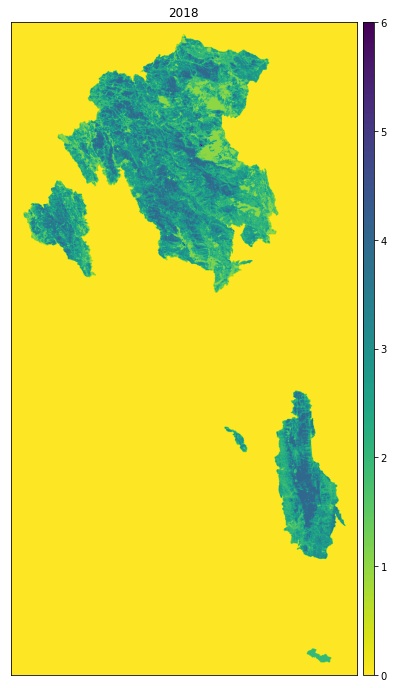

<AxesSubplot:title={'center':'2018'}>

In [112]:
ep.plot_bands(raster_2018_merged, 
              cmap='viridis_r',
              title="2018")

In [113]:

gdal_2018_1 = []
for file in files_2018_1:
    raster_1 = gdal.Open(file)
    gdal_2018_1.append(raster)
    




# stack all .tif layers in ca3831012199020180810 folder 

# Define input and output files
inputfiles =  gdal_2018_1
outputfile =  "2018_1.tif"

# Generate the command
command = "gdal_merge.py -separate %s -o %s" % (inputfiles, outputfile)

# Run the command. os.system() returns value zero if the command was executed succesfully
os.system(command)

512